<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r6_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r6-good.csv?token=AKVFSOGKXYQ27WPLYJJ3HYS6X2UPE"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r6-mal.csv?token=AKVFSOANWJ7ISOFQWZFESJS6X2UPI"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [229]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,35,3,2,2,1,4,3,9,23,7,18,2,0,2,1,0.5,8,1,1,1,1,1,6,2,8,0,6,27,18,1
1,249,0,3,1,1,4,3,9,0,0,22,6,2,3,3,1.0,16,1,1,1,1,1,0,1,4,8,3,27,9,1
2,257,3,0,2,1,4,3,9,22,6,18,2,2,1,0,0.0,4,1,1,1,1,1,0,2,8,16,6,27,18,1
3,305,0,3,3,1,4,3,9,18,2,22,6,2,1,1,1.0,11,2,1,2,2,4,0,3,12,24,9,27,27,1
4,376,3,2,2,1,4,3,9,23,7,18,2,3,2,1,0.5,8,1,2,2,2,4,6,2,8,24,6,27,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12700,3251180,0,3,5,4,2,3,9,0,0,22,6,10024,3,3,1.0,37,1,1,1,1,1,0,20,40,400960,15,27,45,1
12701,3251187,0,3,5,5,3,3,9,0,0,22,6,10024,3,3,1.0,44,1,1,1,1,1,0,25,75,751800,15,27,45,1
12702,3251188,0,3,1,1,4,3,10,0,0,22,6,10025,3,3,1.0,44,1,1,1,1,1,0,1,4,40100,3,30,9,1
12703,3251195,3,0,6,1,1,3,10,22,6,18,2,10024,1,0,0.0,4,1,1,1,1,1,0,6,6,60144,18,30,54,1


In [230]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,31,3,2,2,1,4,3,9,23,7,18,2,1,2,1,0.500000,8,2,1,2,2,4,6,2,8,8,6,27,18,0
1,35,3,2,2,1,4,3,10,23,7,18,2,0,2,1,0.500000,8,1,2,2,2,4,6,2,8,0,6,30,18,0
2,237,0,3,1,1,4,3,9,1,1,22,6,4,2,2,1.000000,12,1,1,1,1,1,0,1,4,16,3,27,9,0
3,245,3,0,2,1,4,3,9,22,6,18,2,4,1,0,0.000000,4,4,1,4,4,16,0,2,8,32,6,27,18,0
4,266,0,3,1,1,4,3,9,0,0,22,6,5,3,3,1.000000,16,3,2,4,6,24,0,1,4,20,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13424,2021332,1,3,5,2,2,3,9,1,1,26,10,11078,3,2,0.666667,19,1,1,1,1,1,3,10,20,221560,15,27,45,0
13425,2021339,1,3,5,3,2,3,9,1,1,26,10,11078,3,2,0.666667,26,1,1,1,1,1,3,15,30,332340,15,27,45,0
13426,2021346,1,3,5,4,2,3,9,1,1,26,10,11078,3,2,0.666667,33,1,1,1,1,1,3,20,40,443120,15,27,45,0
13427,2021353,1,3,5,5,3,3,9,1,1,26,10,11078,3,2,0.666667,40,1,1,1,1,1,3,25,75,830850,15,27,45,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [232]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [234]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,31,3,2,2,1,4,3,9,23,7,18,2,1,2,1,0.5,8,2,1,2,2,4,6,2,8,8,6,27,18,0
1,35,3,2,2,1,4,3,10,23,7,18,2,0,2,1,0.5,8,1,2,2,2,4,6,2,8,0,6,30,18,0
2,35,3,2,2,1,4,3,9,23,7,18,2,0,2,1,0.5,8,1,1,1,1,1,6,2,8,0,6,27,18,1
3,237,0,3,1,1,4,3,9,1,1,22,6,4,2,2,1.0,12,1,1,1,1,1,0,1,4,16,3,27,9,0
4,245,3,0,2,1,4,3,9,22,6,18,2,4,1,0,0.0,4,4,1,4,4,16,0,2,8,32,6,27,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26129,3251180,0,3,5,4,2,3,9,0,0,22,6,10024,3,3,1.0,37,1,1,1,1,1,0,20,40,400960,15,27,45,1
26130,3251187,0,3,5,5,3,3,9,0,0,22,6,10024,3,3,1.0,44,1,1,1,1,1,0,25,75,751800,15,27,45,1
26131,3251188,0,3,1,1,4,3,10,0,0,22,6,10025,3,3,1.0,44,1,1,1,1,1,0,1,4,40100,3,30,9,1
26132,3251195,3,0,6,1,1,3,10,22,6,18,2,10024,1,0,0.0,4,1,1,1,1,1,0,6,6,60144,18,30,54,1


In [235]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.010182,-0.010986,0.041599,0.018818,-0.028217,NaN,0.009072,0.007841,-0.001320,-0.016241,-0.016808,0.832773,0.024876,0.025057,-0.004112,0.030083,-0.349577,-0.349571,-0.421036,-0.323463,-0.247554,-0.001466,0.025414,0.019277,0.437096,0.041599,0.009072,0.041599,0.426191
outport,0.010182,1.000000,-0.267123,0.387793,-0.036994,0.054828,NaN,0.317741,0.905783,0.903062,-0.729993,-0.750806,0.009220,-0.461506,-0.746860,-0.727013,-0.302279,-0.035761,0.065762,0.018067,0.013512,0.006481,0.569763,0.111219,0.118212,0.091085,0.387793,0.317741,0.387793,0.004342
inport,-0.010986,-0.267123,1.000000,-0.134670,0.053585,-0.079271,NaN,-0.552515,-0.285401,-0.424173,0.309200,0.229682,-0.007206,0.457858,0.612247,0.732417,0.275710,-0.049058,-0.140722,-0.114288,-0.123184,-0.116662,0.635054,0.007949,-0.017974,-0.016381,-0.134670,-0.552515,-0.134670,-0.006312
cache_coherence_type,0.041599,0.387793,-0.134670,1.000000,0.411614,-0.611484,NaN,-0.178956,0.325191,0.344636,-0.376380,-0.317573,0.047961,-0.147362,-0.275564,-0.282090,-0.463115,0.040672,-0.030099,0.006367,0.015367,0.012561,0.183192,0.574402,0.446963,0.338969,1.000000,-0.178956,1.000000,0.010494
flit_id,0.018818,-0.036994,0.053585,0.411614,1.000000,-0.064077,NaN,-0.265665,-0.058276,-0.045536,0.151371,0.051982,0.023167,0.019120,0.071534,0.033172,0.525442,0.031453,0.001741,0.019990,0.034936,0.021322,0.032465,0.975363,0.940635,0.702428,0.411614,-0.265665,0.411614,0.003921
flit_type,-0.028217,0.054828,-0.079271,-0.611484,-0.064077,1.000000,NaN,0.394480,0.086422,0.067487,-0.224768,-0.077096,-0.034641,-0.028172,-0.106003,-0.048972,0.465024,-0.061371,0.122733,0.036953,0.014240,0.009718,-0.048057,-0.166603,0.089354,0.062710,-0.611484,0.394480,-0.611484,-0.005980
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.009072,0.317741,-0.552515,-0.178956,-0.265665,0.394480,NaN,1.000000,0.272615,0.317502,-0.391566,-0.260213,0.014386,-0.267331,-0.438440,-0.550603,-0.059849,0.004029,0.144163,0.089243,0.092182,0.086202,-0.224660,-0.252578,-0.154016,-0.108994,-0.178956,1.000000,-0.178956,-0.008961
src_ni,0.007841,0.905783,-0.285401,0.325191,-0.058276,0.086422,NaN,0.272615,1.000000,0.959502,-0.757790,-0.883826,0.010632,-0.721165,-0.851286,-0.603097,-0.363094,-0.008861,0.069544,0.036544,0.034537,0.028429,0.489655,0.088669,0.096850,0.077207,0.325191,0.272615,0.325191,-0.006076
src_router,-0.001320,0.903062,-0.424173,0.344636,-0.045536,0.067487,NaN,0.317502,0.959502,1.000000,-0.755235,-0.846612,0.013124,-0.717136,-0.884510,-0.677738,-0.360359,0.012348,0.081823,0.056711,0.055353,0.046712,0.370313,0.098574,0.104913,0.083896,0.344636,0.317502,0.344636,-0.029774


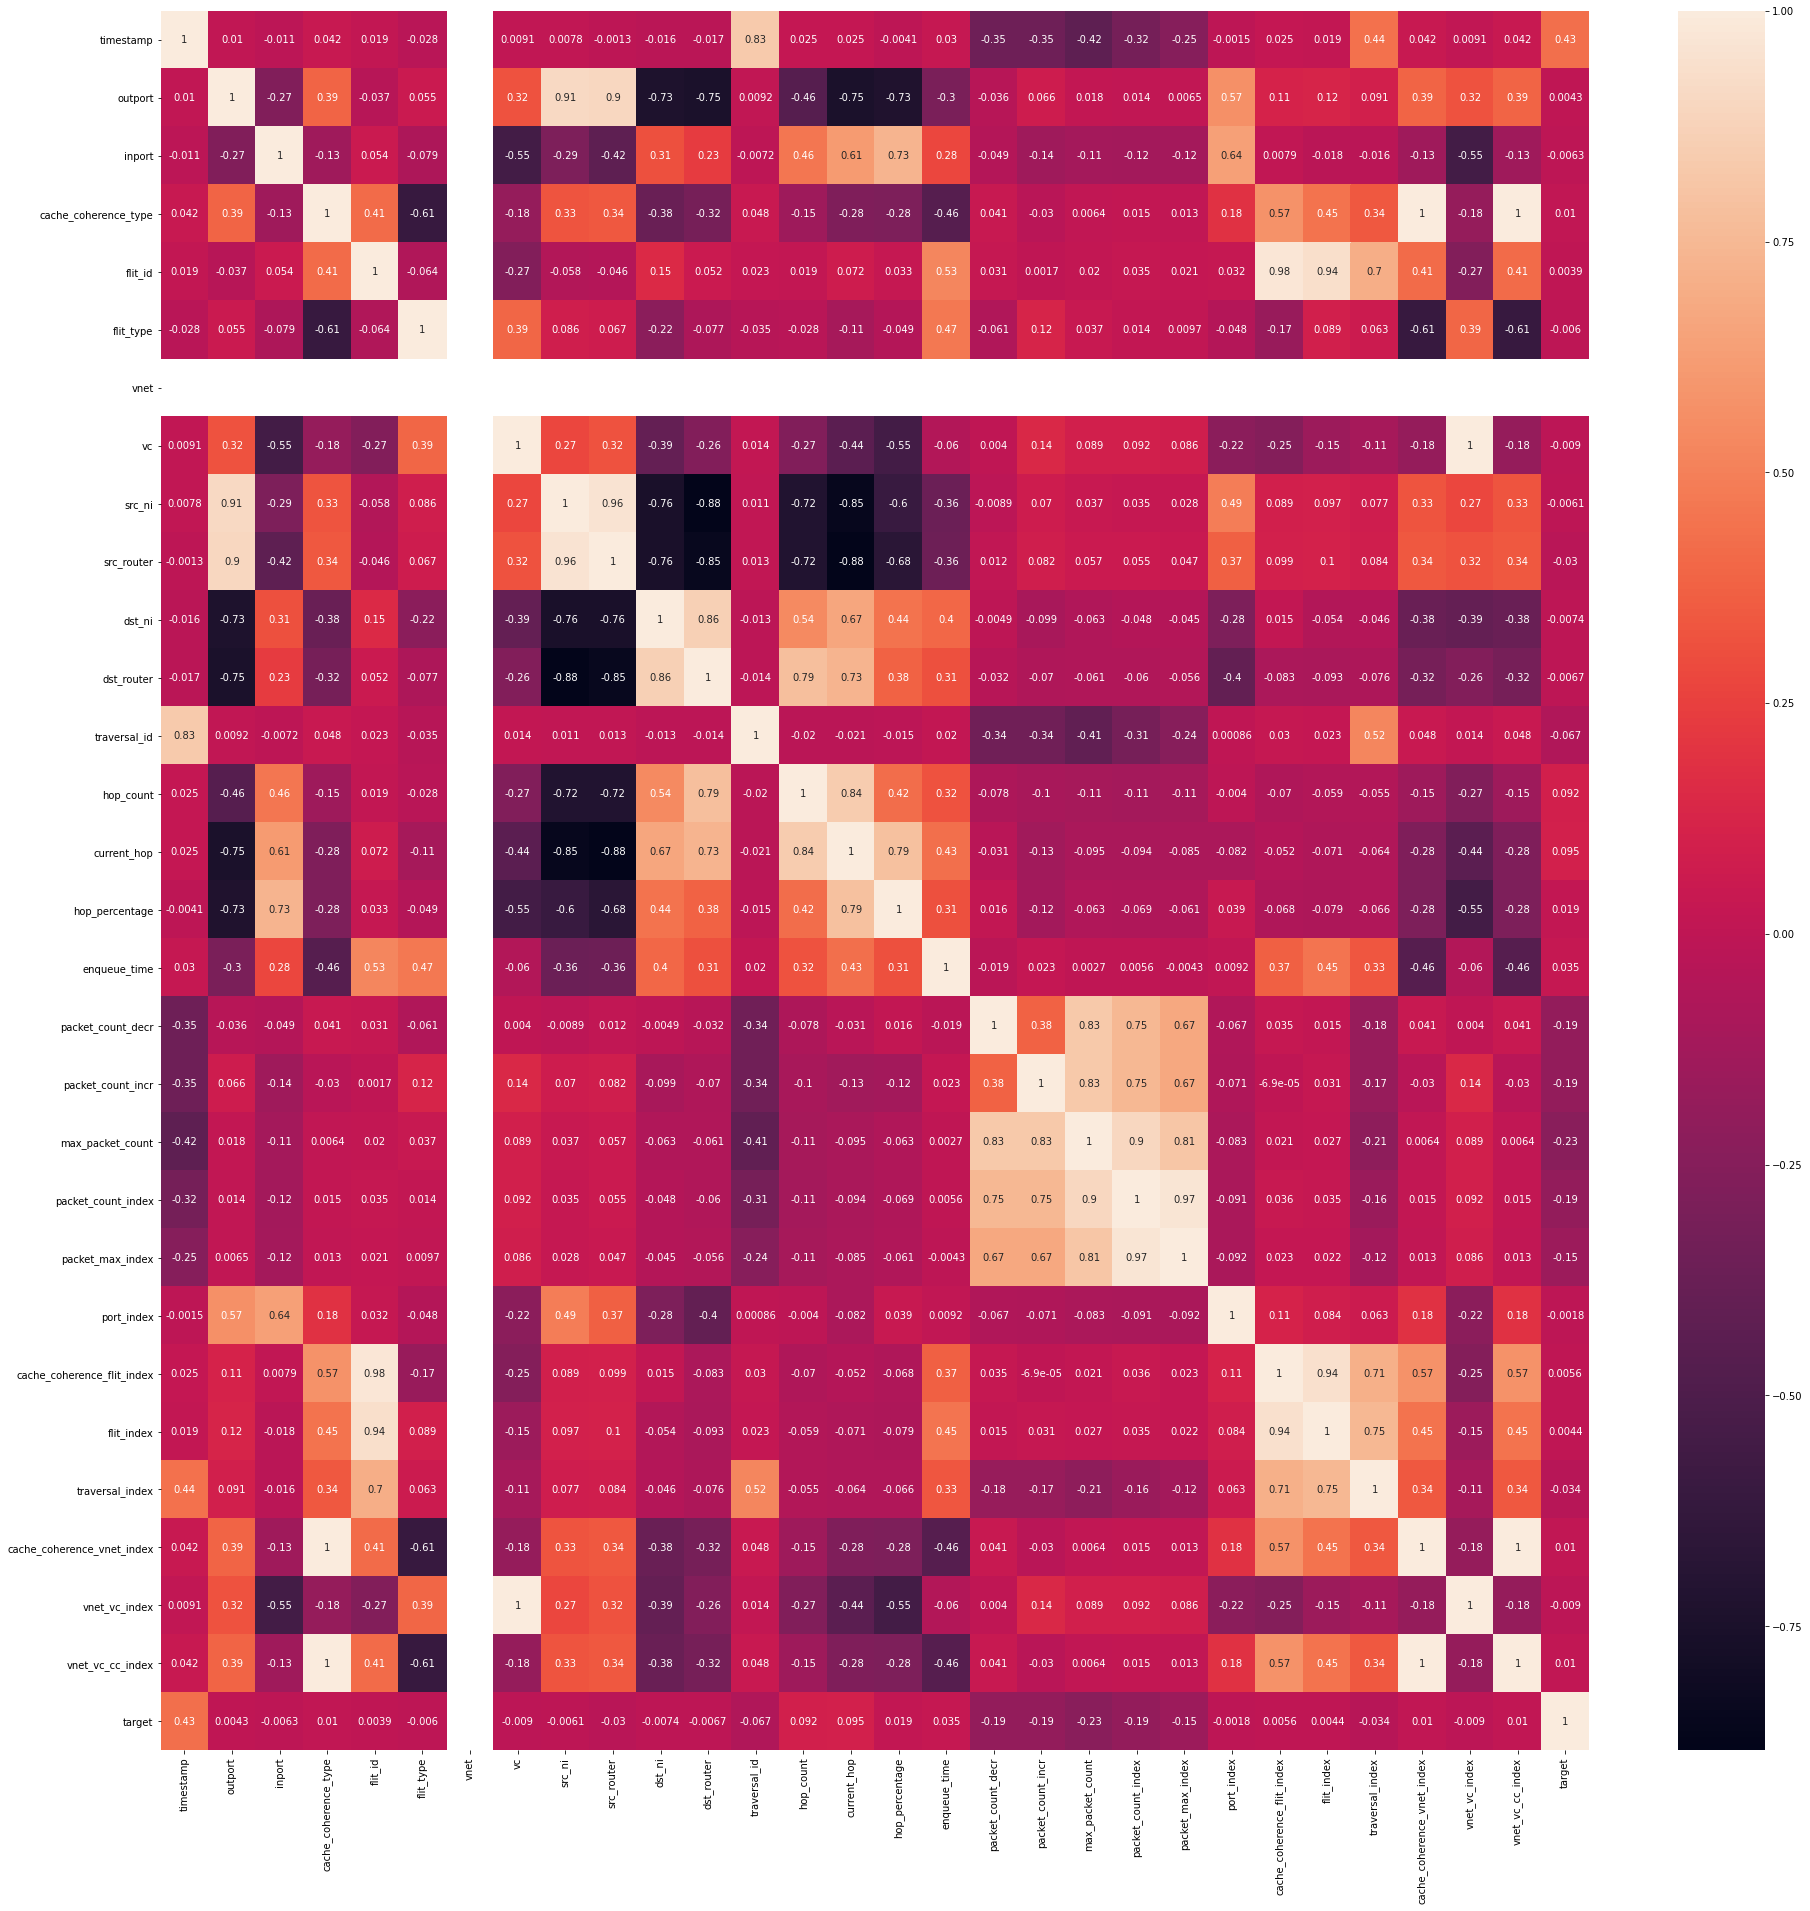

In [236]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [237]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,2,2,1,4,3,9,18,2,1,2,1,0.5,8,2,1,2,2,4,6,2,8,8,6,27,18
1,3,2,2,1,4,3,10,18,2,0,2,1,0.5,8,1,2,2,2,4,6,2,8,0,6,30,18
2,3,2,2,1,4,3,9,18,2,0,2,1,0.5,8,1,1,1,1,1,6,2,8,0,6,27,18
3,0,3,1,1,4,3,9,22,6,4,2,2,1.0,12,1,1,1,1,1,0,1,4,16,3,27,9
4,3,0,2,1,4,3,9,18,2,4,1,0,0.0,4,4,1,4,4,16,0,2,8,32,6,27,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26129,0,3,5,4,2,3,9,22,6,10024,3,3,1.0,37,1,1,1,1,1,0,20,40,400960,15,27,45
26130,0,3,5,5,3,3,9,22,6,10024,3,3,1.0,44,1,1,1,1,1,0,25,75,751800,15,27,45
26131,0,3,1,1,4,3,10,22,6,10025,3,3,1.0,44,1,1,1,1,1,0,1,4,40100,3,30,9
26132,3,0,6,1,1,3,10,18,2,10024,1,0,0.0,4,1,1,1,1,1,0,6,6,60144,18,30,54


In [238]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.50,0.166667,0.00,1.000000,0.0,0.000000,0.600000,0.142857,0.000090,0.25,0.333333,0.5,0.062500,0.052632,0.000000,0.052632,0.009174,0.001364,0.5,0.034483,0.046512,0.000008,0.166667,0.000000,0.166667
1,0.75,0.50,0.166667,0.00,1.000000,0.0,0.333333,0.600000,0.142857,0.000000,0.25,0.333333,0.5,0.062500,0.000000,0.052632,0.052632,0.009174,0.001364,0.5,0.034483,0.046512,0.000000,0.166667,0.333333,0.166667
2,0.75,0.50,0.166667,0.00,1.000000,0.0,0.000000,0.600000,0.142857,0.000000,0.25,0.333333,0.5,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
3,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.733333,0.428571,0.000361,0.25,0.666667,1.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.75,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.600000,0.142857,0.000361,0.00,0.000000,0.0,0.000000,0.157895,0.000000,0.157895,0.027523,0.006821,0.0,0.034483,0.046512,0.000032,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26129,0.00,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.733333,0.428571,0.904775,0.50,1.000000,1.0,0.515625,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.655172,0.418605,0.403177,0.666667,0.000000,0.666667
26130,0.00,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.733333,0.428571,0.904775,0.50,1.000000,1.0,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.827586,0.825581,0.755958,0.666667,0.000000,0.666667
26131,0.00,0.75,0.000000,0.00,1.000000,0.0,0.333333,0.733333,0.428571,0.904865,0.50,1.000000,1.0,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.040322,0.000000,0.333333,0.000000
26132,0.75,0.00,0.833333,0.00,0.000000,0.0,0.333333,0.600000,0.142857,0.904775,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.172414,0.023256,0.060477,0.833333,0.333333,0.833333


In [239]:
train_X[train_X.duplicated()].shape

(166, 26)

In [240]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.267123,0.387793,-0.036994,0.054828,NaN,0.317741,-0.729993,-0.750806,0.009220,-0.461506,-0.746860,-0.727013,-0.302279,-0.035761,0.065762,0.018067,0.013512,0.006481,0.569763,0.111219,0.118212,0.091085,0.387793,0.317741,0.387793,0.004342
inport,-0.267123,1.000000,-0.134670,0.053585,-0.079271,NaN,-0.552515,0.309200,0.229682,-0.007206,0.457858,0.612247,0.732417,0.275710,-0.049058,-0.140722,-0.114288,-0.123184,-0.116662,0.635054,0.007949,-0.017974,-0.016381,-0.134670,-0.552515,-0.134670,-0.006312
cache_coherence_type,0.387793,-0.134670,1.000000,0.411614,-0.611484,NaN,-0.178956,-0.376380,-0.317573,0.047961,-0.147362,-0.275564,-0.282090,-0.463115,0.040672,-0.030099,0.006367,0.015367,0.012561,0.183192,0.574402,0.446963,0.338969,1.000000,-0.178956,1.000000,0.010494
flit_id,-0.036994,0.053585,0.411614,1.000000,-0.064077,NaN,-0.265665,0.151371,0.051982,0.023167,0.019120,0.071534,0.033172,0.525442,0.031453,0.001741,0.019990,0.034936,0.021322,0.032465,0.975363,0.940635,0.702428,0.411614,-0.265665,0.411614,0.003921
flit_type,0.054828,-0.079271,-0.611484,-0.064077,1.000000,NaN,0.394480,-0.224768,-0.077096,-0.034641,-0.028172,-0.106003,-0.048972,0.465024,-0.061371,0.122733,0.036953,0.014240,0.009718,-0.048057,-0.166603,0.089354,0.062710,-0.611484,0.394480,-0.611484,-0.005980
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.317741,-0.552515,-0.178956,-0.265665,0.394480,NaN,1.000000,-0.391566,-0.260213,0.014386,-0.267331,-0.438440,-0.550603,-0.059849,0.004029,0.144163,0.089243,0.092182,0.086202,-0.224660,-0.252578,-0.154016,-0.108994,-0.178956,1.000000,-0.178956,-0.008961
dst_ni,-0.729993,0.309200,-0.376380,0.151371,-0.224768,NaN,-0.391566,1.000000,0.863704,-0.013470,0.537162,0.667338,0.442251,0.402606,-0.004891,-0.099048,-0.062593,-0.047817,-0.045359,-0.283328,0.015112,-0.053955,-0.045530,-0.376380,-0.391566,-0.376380,-0.007354
dst_router,-0.750806,0.229682,-0.317573,0.051982,-0.077096,NaN,-0.260213,0.863704,1.000000,-0.014150,0.785490,0.734209,0.379920,0.314934,-0.031952,-0.070097,-0.061456,-0.060364,-0.055668,-0.404919,-0.083362,-0.092990,-0.075860,-0.317573,-0.260213,-0.317573,-0.006747
traversal_id,0.009220,-0.007206,0.047961,0.023167,-0.034641,NaN,0.014386,-0.013470,-0.014150,1.000000,-0.019828,-0.021364,-0.015176,0.020251,-0.340555,-0.340518,-0.410151,-0.314609,-0.240750,0.000856,0.030427,0.022801,0.524672,0.047961,0.014386,0.047961,-0.067028


Principal Component Analysis

In [241]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 0.22440127,  1.01244401, -0.17398136, ..., -0.21773458,
        -0.28407011,  0.39709627],
       [ 0.16445075,  1.17959796, -0.04330858, ..., -0.00726178,
        -0.09884483,  0.11939014],
       [ 0.22536478,  1.01149714, -0.17602867, ..., -0.22144791,
        -0.28893074,  0.4065705 ],
       ...,
       [ 1.31738526,  0.77250328,  0.37772284, ..., -0.40751798,
         0.34134736, -0.12281203],
       [-0.85275918,  0.87888304,  0.10905736, ..., -0.23212317,
        -0.2426434 , -0.10277078],
       [-0.95847089,  0.64695168,  0.4082129 , ..., -0.22306344,
        -0.1937349 ,  0.02040954]])

In [242]:
pca.explained_variance_ratio_

array([0.2962024 , 0.24825652, 0.14137293, 0.11776798, 0.05451876,
       0.05107624, 0.03029705, 0.02265976])

Text(0, 0.5, 'Variance')

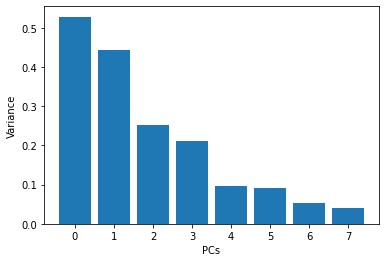

In [243]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [244]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7
0,0.224401,1.012444,-0.173981,0.452479,0.502275,-0.217735,-0.284070,0.397096
1,0.164451,1.179598,-0.043309,0.488314,0.425531,-0.007262,-0.098845,0.119390
2,0.225365,1.011497,-0.176029,0.453776,0.479617,-0.221448,-0.288931,0.406571
3,1.152753,0.807775,0.174629,0.266489,0.561776,-0.588779,0.077041,0.229546
4,-0.154017,1.389601,0.399038,0.068987,0.591383,-0.350756,-0.590216,0.542587
...,...,...,...,...,...,...,...,...
26129,0.429837,-0.695427,0.375053,-0.153107,-0.311135,-0.465885,0.353394,-0.123173
26130,0.279220,-1.004303,0.739067,0.250086,-0.363720,-0.466253,0.418352,0.028064
26131,1.317385,0.772503,0.377723,0.425632,-0.337872,-0.407518,0.341347,-0.122812
26132,-0.852759,0.878883,0.109057,-0.914776,-0.378121,-0.232123,-0.242643,-0.102771


In [245]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,target
0,1.000000e+00,7.496013e-16,-1.107079e-15,1.397544e-15,3.004736e-16,-1.243324e-15,-1.134449e-15,1.872751e-16,0.027600
1,7.496013e-16,1.000000e+00,9.300061e-16,-2.153731e-15,-1.358973e-16,-8.550597e-16,5.553527e-16,1.804300e-15,-0.026968
2,-1.107079e-15,9.300061e-16,1.000000e+00,-1.618884e-15,6.215310e-16,-1.079116e-15,1.041328e-15,-7.298059e-16,-0.012369
3,1.397544e-15,-2.153731e-15,-1.618884e-15,1.000000e+00,2.407500e-16,-8.291439e-16,-1.827294e-15,4.076159e-16,-0.006109
4,3.004736e-16,-1.358973e-16,6.215310e-16,2.407500e-16,1.000000e+00,-6.987556e-16,2.124628e-16,3.013021e-16,-0.011666
5,-1.243324e-15,-8.550597e-16,-1.079116e-15,-8.291439e-16,-6.987556e-16,1.000000e+00,5.149817e-16,8.104185e-16,0.073022
6,-1.134449e-15,5.553527e-16,1.041328e-15,-1.827294e-15,2.124628e-16,5.149817e-16,1.000000e+00,-2.299248e-16,0.044733
7,1.872751e-16,1.804300e-15,-7.298059e-16,4.076159e-16,3.013021e-16,8.104185e-16,-2.299248e-16,1.000000e+00,0.069459
target,2.760005e-02,-2.696810e-02,-1.236852e-02,-6.108519e-03,-1.166629e-02,7.302174e-02,4.473349e-02,6.945918e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

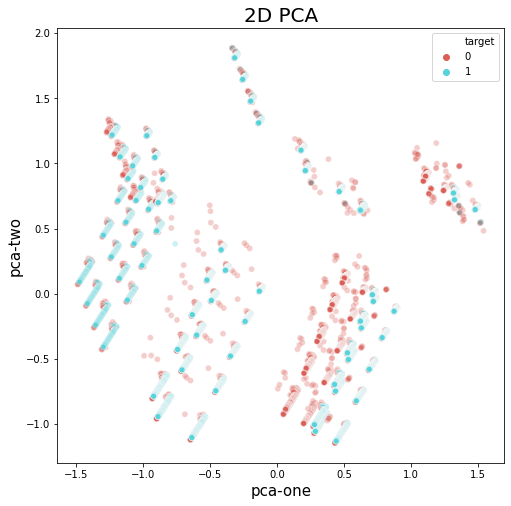

In [247]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

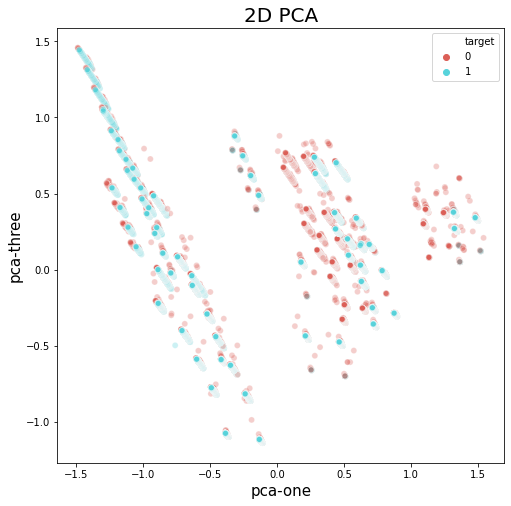

In [248]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

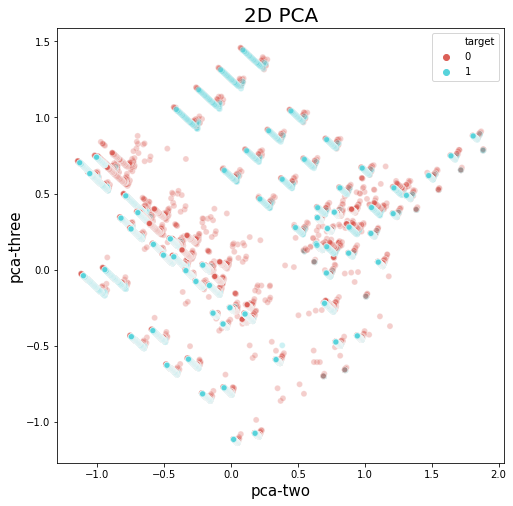

In [249]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

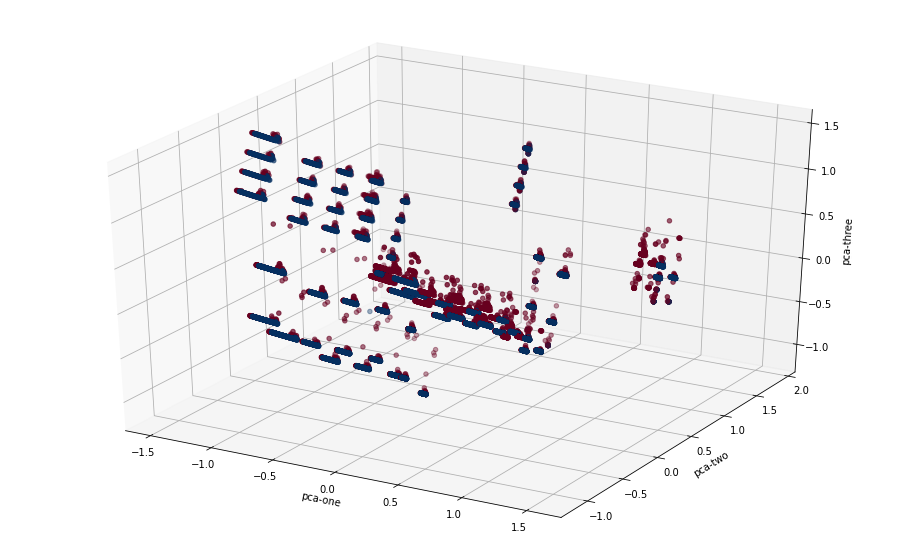

In [250]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

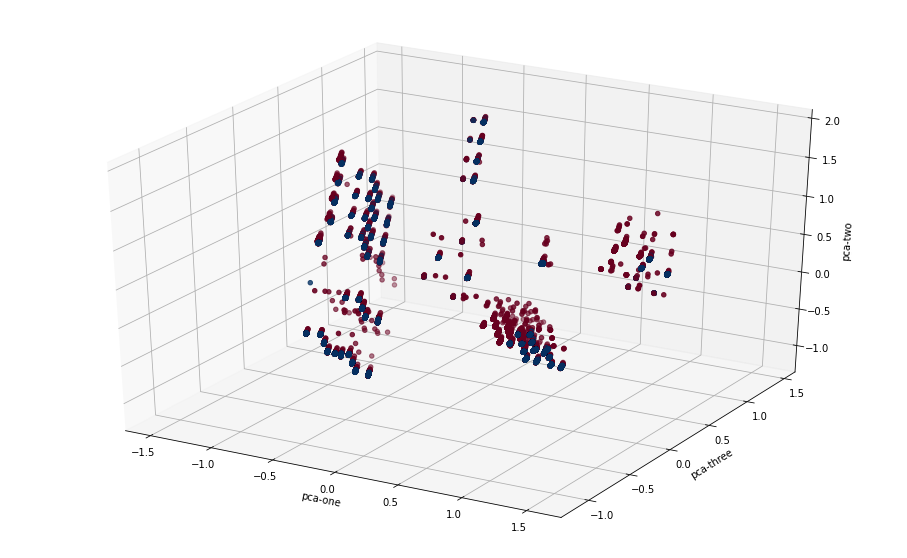

In [251]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

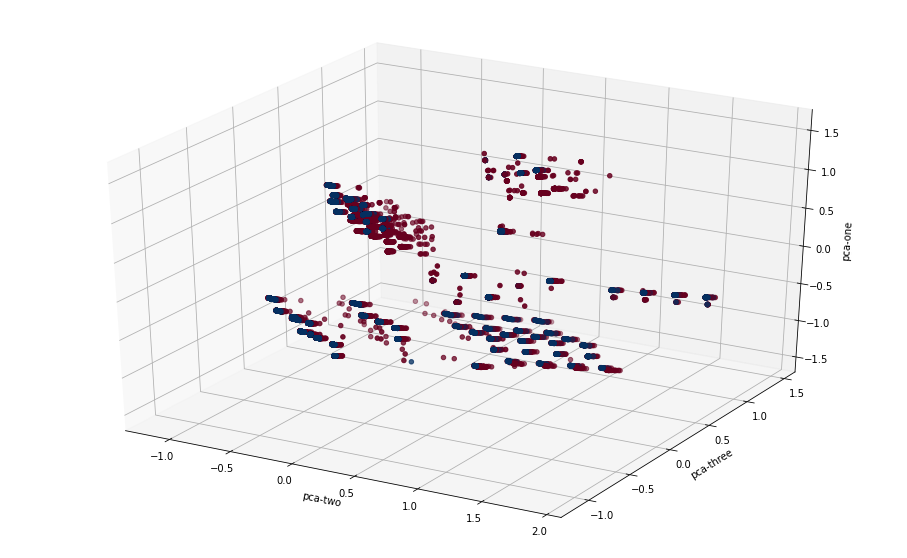

In [252]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [253]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 77.88906979560852 seconds


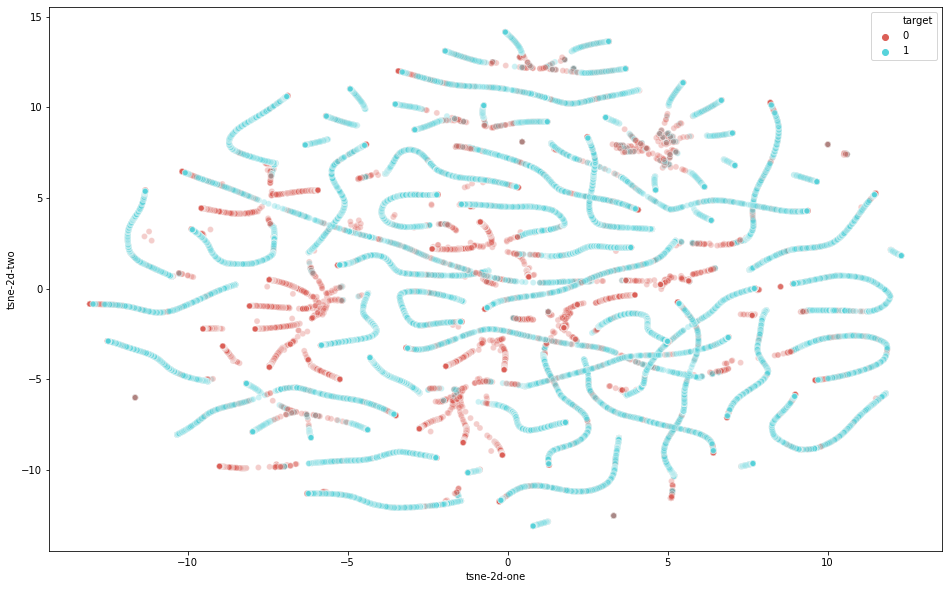

In [254]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

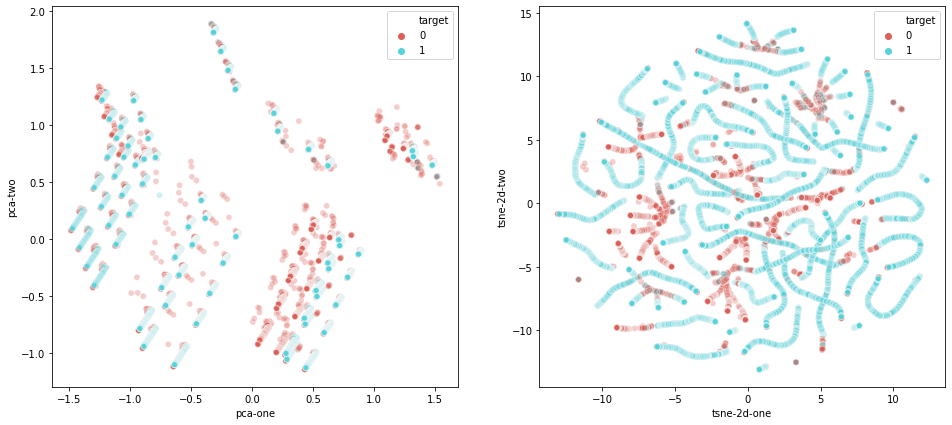

In [255]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [256]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 71.21998691558838 seconds


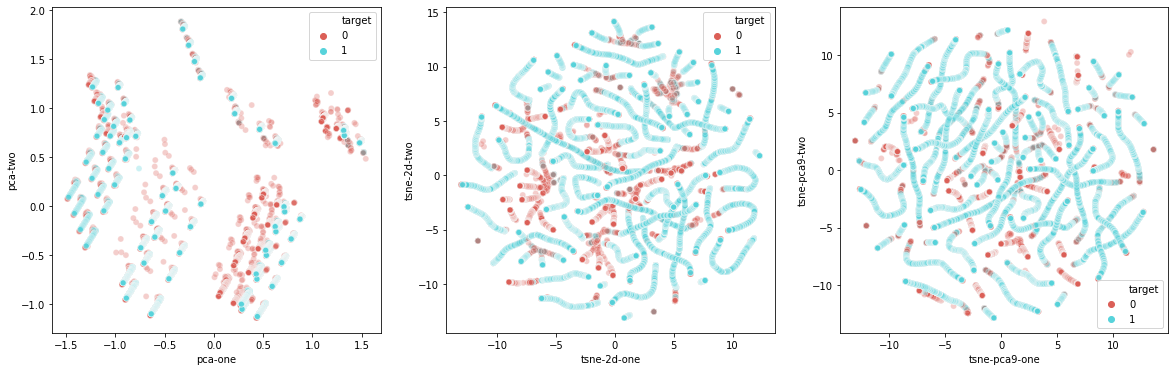

In [257]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [259]:
train_Y = df['target']
train_Y.value_counts()

0    13429
1    12705
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs       Score
16            max_packet_count  473.737096
15           packet_count_incr  237.176445
14           packet_count_decr  236.567167
17          packet_count_index  212.165365
18            packet_max_index  143.949970
11                 current_hop   39.387828
10                   hop_count   34.827692
9                 traversal_id   14.404000
22             traversal_index    3.999447
13                enqueue_time    2.430793
12              hop_percentage    0.779636
19                  port_index    0.512352
1                       inport    0.449539
6                           vc    0.424473
24               vnet_vc_index    0.424473
2         cache_coherence_type    0.310052
23  cache_coherence_vnet_index    0.310052


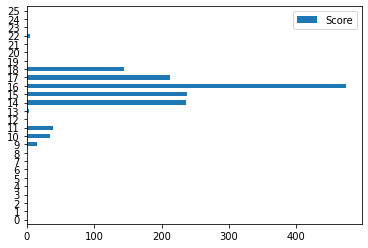

In [262]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [265]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [266]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 67.35064810828909
Test Prediction  66.61564951214845


In [267]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,dst_ni,9.052026
10,hop_count,5.111618
18,packet_max_index,3.482113
17,packet_count_index,2.863258
4,flit_type,2.628063
20,cache_coherence_flit_index,2.284440
25,vnet_vc_cc_index,1.129861
2,cache_coherence_type,1.129861
23,cache_coherence_vnet_index,1.129861
13,enqueue_time,0.808816


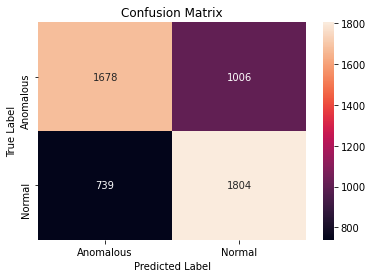

In [268]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [269]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      2684
           1       0.64      0.71      0.67      2543

    accuracy                           0.67      5227
   macro avg       0.67      0.67      0.67      5227
weighted avg       0.67      0.67      0.67      5227



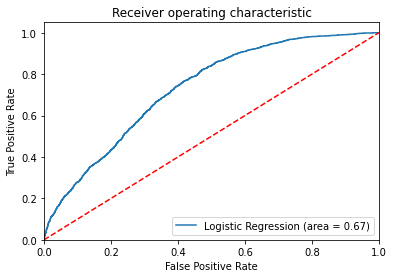

In [270]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [271]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [273]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 78.45697613239585
Test Prediction  67.11306676870097


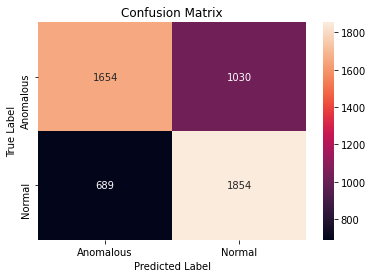

In [274]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [275]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      2684
           1       0.64      0.73      0.68      2543

    accuracy                           0.67      5227
   macro avg       0.67      0.67      0.67      5227
weighted avg       0.68      0.67      0.67      5227



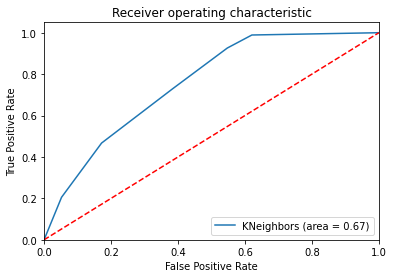

In [276]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [278]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [280]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 56.756110393648065
Test Prediction Score 56.72469867993113


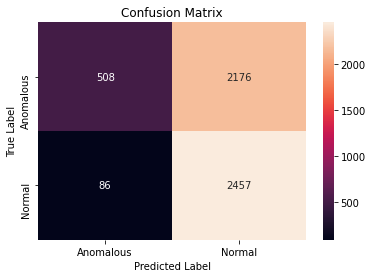

In [281]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [282]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.19      0.31      2684
           1       0.53      0.97      0.68      2543

    accuracy                           0.57      5227
   macro avg       0.69      0.58      0.50      5227
weighted avg       0.70      0.57      0.49      5227



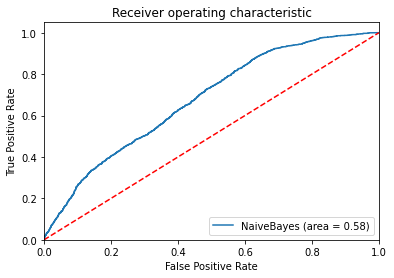

In [283]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [285]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 16725 samples, validate on 4182 samples
Epoch 1/10
16725/16725 [==============================] - 1s 41us/step - loss: 0.2507 - accuracy: 0.5125 - val_loss: 0.2496 - val_accuracy: 0.5117
Epoch 2/10
16725/16725 [==============================] - 1s 38us/step - loss: 0.2481 - accuracy: 0.5428 - val_loss: 0.2463 - val_accuracy: 0.5677
Epoch 3/10
16725/16725 [==============================] - 1s 36us/step - loss: 0.2437 - accuracy: 0.5797 - val_loss: 0.2397 - val_accuracy: 0.5985
Epoch 4/10
16725/16725 [==============================] - 1s 37us/step - loss: 0.2368 - accuracy: 0.6237 - val_loss: 0.2324 - val_accuracy: 0.6521
Epoch 5/10
16725/16725 [==============================] - 1s 36us/step - loss: 0.2303 - accuracy: 0.6420 - val_loss: 0.2265 - val_accuracy: 0.6547
Epoch 6/10
16725/16725 [==============================] - 1s 37us/step - loss: 0.2254 - accuracy: 0.6509 - val_loss: 0.2219 - val_accuracy: 0.6631
Epoch 7/10
16725/16725 [==============================] - 1s 37us/ste

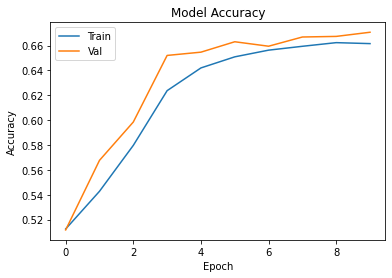

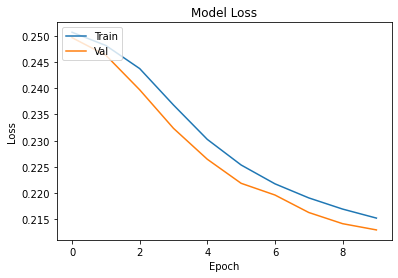

In [286]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [287]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.63%


3-Layer Neural Network

In [288]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 16725 samples, validate on 4182 samples
Epoch 1/15
16725/16725 [==============================] - 1s 40us/step - loss: 0.2499 - accuracy: 0.5115 - val_loss: 0.2500 - val_accuracy: 0.5031
Epoch 2/15
16725/16725 [==============================] - 1s 37us/step - loss: 0.2498 - accuracy: 0.5138 - val_loss: 0.2500 - val_accuracy: 0.5038
Epoch 3/15
16725/16725 [==============================] - 1s 37us/step - loss: 0.2498 - accuracy: 0.5147 - val_loss: 0.2500 - val_accuracy: 0.5038
Epoch 4/15
16725/16725 [==============================] - 1s 36us/step - loss: 0.2496 - accuracy: 0.5147 - val_loss: 0.2498 - val_accuracy: 0.5041
Epoch 5/15
16725/16725 [==============================] - 1s 37us/step - loss: 0.2492 - accuracy: 0.5146 - val_loss: 0.2494 - val_accuracy: 0.5041
Epoch 6/15
16725/16725 [==============================] - 1s 37us/step - loss: 0.2486 - accuracy: 0.5147 - val_loss: 0.2489 - val_accuracy: 0.5038
Epoch 7/15
16725/16725 [==============================] - 1s 36us/ste

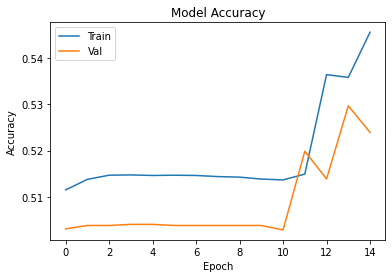

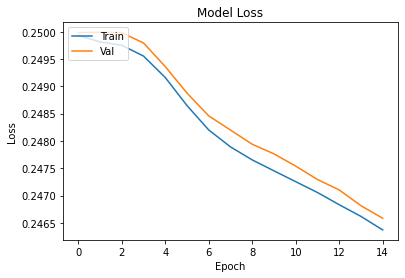

In [289]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [290]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.89%


4-Layer Neural Network



In [291]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 16725 samples, validate on 4182 samples
Epoch 1/30
16725/16725 [==============================] - 1s 40us/step - loss: 0.2500 - accuracy: 0.5128 - val_loss: 0.2500 - val_accuracy: 0.5053
Epoch 2/30
16725/16725 [==============================] - 1s 38us/step - loss: 0.2498 - accuracy: 0.5152 - val_loss: 0.2500 - val_accuracy: 0.5057
Epoch 3/30
16725/16725 [==============================] - 1s 37us/step - loss: 0.2498 - accuracy: 0.5158 - val_loss: 0.2500 - val_accuracy: 0.5060
Epoch 4/30
16725/16725 [==============================] - 1s 37us/step - loss: 0.2498 - accuracy: 0.5158 - val_loss: 0.2501 - val_accuracy: 0.5060
Epoch 5/30
16725/16725 [==============================] - 1s 37us/step - loss: 0.2498 - accuracy: 0.5158 - val_loss: 0.2501 - val_accuracy: 0.5060
Epoch 6/30
16725/16725 [==============================] - 1s 37us/step - loss: 0.2498 - accuracy: 0.5158 - val_loss: 0.2501 - val_accuracy: 0.5060
Epoch 7/30
16725/16725 [==============================] - 1s 36us/ste

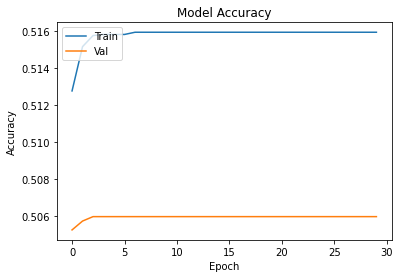

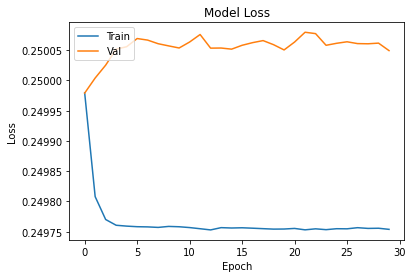

In [292]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [293]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 51.35%


5-Layer Neural Network Optimized

In [294]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 16725 samples, validate on 4182 samples
Epoch 1/100
16725/16725 [==============================] - 2s 97us/step - loss: 0.2179 - accuracy: 0.6276 - val_loss: 0.2355 - val_accuracy: 0.5758
Epoch 2/100
16725/16725 [==============================] - 1s 65us/step - loss: 0.2032 - accuracy: 0.6688 - val_loss: 0.1976 - val_accuracy: 0.6736
Epoch 3/100
16725/16725 [==============================] - 1s 65us/step - loss: 0.1987 - accuracy: 0.6793 - val_loss: 0.1895 - val_accuracy: 0.6980
Epoch 4/100
16725/16725 [==============================] - 1s 65us/step - loss: 0.1977 - accuracy: 0.6824 - val_loss: 0.1880 - val_accuracy: 0.6925
Epoch 5/100
16725/16725 [==============================] - 1s 66us/step - loss: 0.1951 - accuracy: 0.6859 - val_loss: 0.1926 - val_accuracy: 0.6951
Epoch 6/100
16725/16725 [==============================] - 1s 65us/step - loss: 0.1927 - accuracy: 0.6926 - val_loss: 0.1998 - val_accuracy: 0.6894
Epoch 7/100
16725/16725 [==============================] - 1s 6

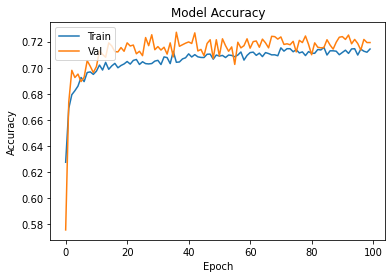

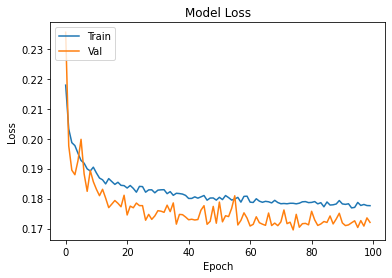

In [295]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [296]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.05%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [298]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8146075477112928


In [299]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [301]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.40345338881714
Test Prediction Score 87.46891142146546


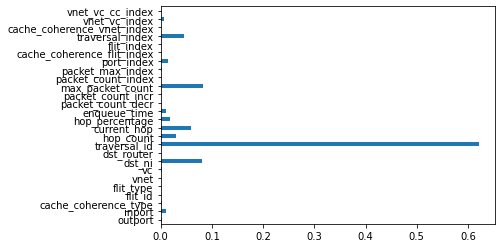

In [302]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

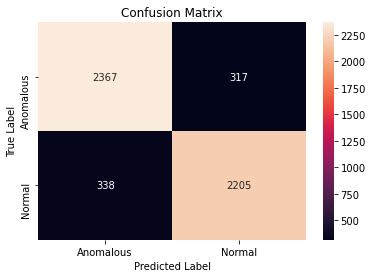

In [303]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [304]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2684
           1       0.87      0.87      0.87      2543

    accuracy                           0.87      5227
   macro avg       0.87      0.87      0.87      5227
weighted avg       0.87      0.87      0.87      5227



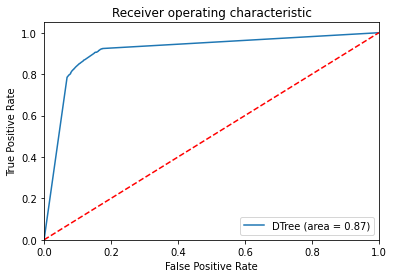

In [305]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [308]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [310]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.34471708040368
Test Prediction Score 88.06198584273962


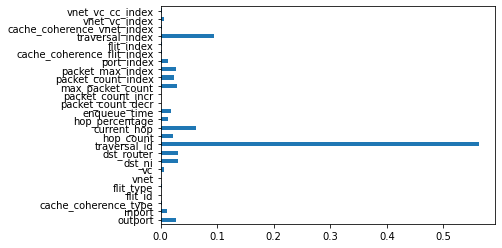

In [311]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

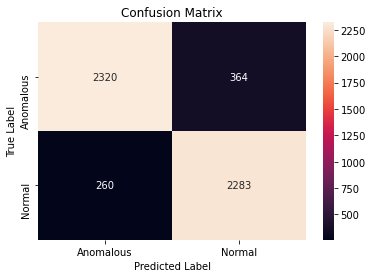

In [312]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [313]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2684
           1       0.86      0.90      0.88      2543

    accuracy                           0.88      5227
   macro avg       0.88      0.88      0.88      5227
weighted avg       0.88      0.88      0.88      5227



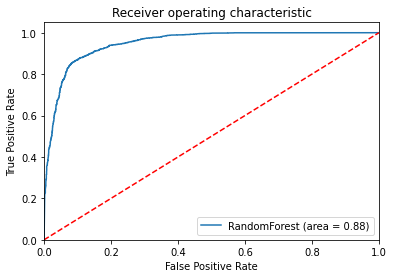

In [314]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [317]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [319]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.47864351652557
Test Prediction Score 92.30916395638033


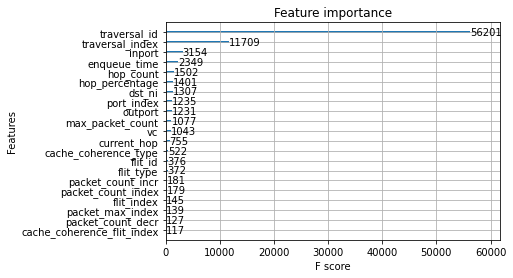

In [320]:
plot_importance(xgbc)
plt.show()

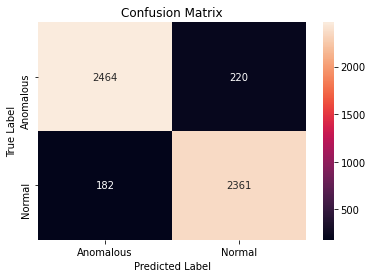

In [321]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [322]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2684
           1       0.91      0.93      0.92      2543

    accuracy                           0.92      5227
   macro avg       0.92      0.92      0.92      5227
weighted avg       0.92      0.92      0.92      5227



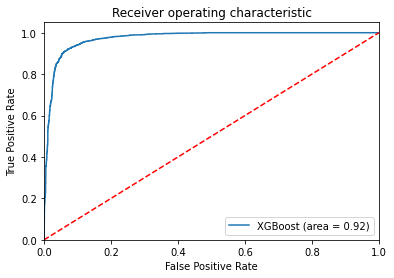

In [323]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [326]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [328]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.82737839001291
Test Prediction Score 75.87526305720299


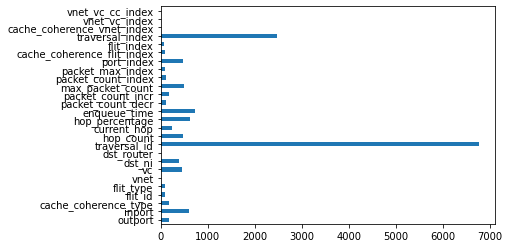

In [329]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

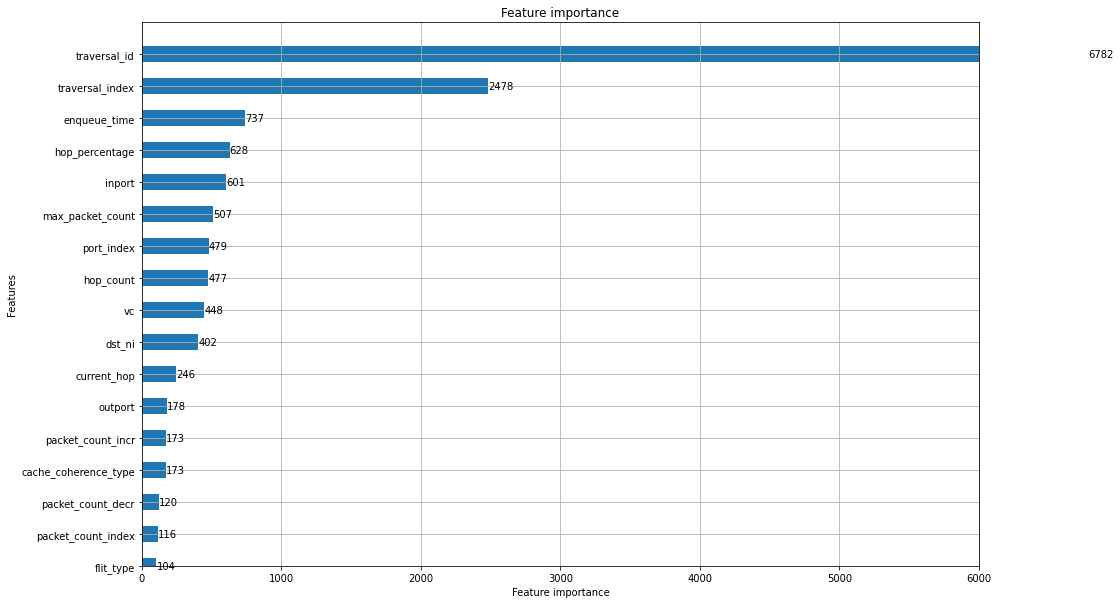

In [330]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6000), ylim = (0,17), figsize = (15,10))
plt.show()

In [331]:
sorted(gbm.feature_importances_,reverse=True)

[6782,
 2478,
 737,
 628,
 601,
 507,
 479,
 477,
 448,
 402,
 246,
 178,
 173,
 173,
 120,
 116,
 104,
 104,
 88,
 86,
 73,
 0,
 0,
 0,
 0,
 0]

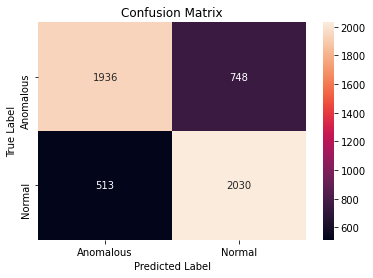

In [332]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [333]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      2684
           1       0.73      0.80      0.76      2543

    accuracy                           0.76      5227
   macro avg       0.76      0.76      0.76      5227
weighted avg       0.76      0.76      0.76      5227



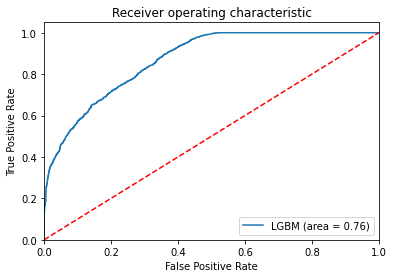

In [334]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()